# TP - Analyse de la Performance des Étudiants

Ce notebook a pour objectif d'appliquer les concepts de régression linéaire et logistique sur un dataset personnalisé simulant des facteurs influençant la performance des étudiants.

## Dataset
Généré via <b>Mockaroo</b>, comprenant les colonnes :
- `Hours_Studied`
- `Previous_Score`
- `Attendance_Rate`
- `Final_Exam_Score`
- `Passed_Course`



## Étape 1 : Importer les Bibliothèques Nécessaires

On commence par importer les outils dont on aura besoin : pandas pour manipuler les données, numpy (souvent utile), matplotlib pour les visualisations, et les modules de sklearn pour la régression et la séparation des données.


In [3]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des modèles et outils de sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Pour évaluer la régression linéaire
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Pour évaluer la régression logistique

## Étape 2 : Charger le Dataset

Charge ton fichier CSV généré par Mockaroo dans un DataFrame pandas. Assure-toi que le fichier se trouve dans le même répertoire que ton notebook, ou spécifie le chemin complet.

In [58]:
data = pd.read_csv('dataset_etudiant.csv')

## Étape 3 : Explorer les Données

Regarde les premières lignes du dataset, les informations sur les colonnes (types de données, valeurs manquantes) et éventuellement quelques statistiques descriptives.

In [61]:
#Afficher les premières lignes du dataset
print("Aperçu des premières lignes :")
data.head()

Aperçu des premières lignes :


,Hours_Studied,Previous_Score,Attendance_Rate,Final_Exam_Score,Passed_Course
0,24,11,98,20.000000,1
1,19,18,11,20.000000,1
2,22,13,57,20.000000,1
3,7,9,11,13.949407,0
4,8,10,54,15.199610,1


In [63]:
print("\nStatistiques descriptives :")
data.describe()


Statistiques descriptives :


,Hours_Studied,Previous_Score,Attendance_Rate,Final_Exam_Score,Passed_Course
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.085000,12.976000,50.620000,18.617116,0.908000
std,7.450993,3.109517,28.853806,2.036241,0.289171
min,5.000000,8.000000,0.000000,12.082703,0.000000
25%,11.000000,10.000000,27.000000,17.310030,1.000000
50%,17.000000,13.000000,51.000000,20.000000,1.000000
75%,23.000000,16.000000,76.000000,20.000000,1.000000
max,30.000000,18.000000,100.000000,20.000000,1.000000


In [65]:
# Afficher les informations sur le dataset
print("\nInformations sur le dataset :")
data.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hours_Studied     1000 non-null   int64  
 1   Previous_Score    1000 non-null   int64  
 2   Attendance_Rate   1000 non-null   int64  
 3   Final_Exam_Score  1000 non-null   float64
 4   Passed_Course     1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


# Partie 1 : Régression Linéaire - Prédire la Note Finale (`Final_Exam_Score`)
Ici, on va construire un modèle pour prédire la note exacte de l'examen final en fonction des heures étudiées, de la note précédente et du taux de présence.

## Étape 4 : Préparer les Données pour la Régression Linéaire
Ici, on choisit explicitement une seule variable explicative (`Hours_Studied`) et la variable cible (``Final_Exam_Score``).

In [68]:
# Sélectionner les variables explicatives (X) et la variable cible (y)
X_lin = data[['Hours_Studied']] 
y_lin = data['Final_Exam_Score'] 

## Étape 5 : Séparer les Données en Ensembles d'Entraînement et de Test
On divise le dataset en deux sous-ensembles : un pour entraîner le modèle (Train) et un autre pour évaluer sa performance sur des données qu'il n'a jamais vues (Test).

In [71]:
# Séparer les données en training set et test set
# On utilise 80% pour l'entraînement et 20% pour le test 
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=0)

print(f"\nDimensions des ensembles Training (Linéaire) : X={X_train_lin.shape}, y={y_train_lin.shape}")
print(f"Dimensions des ensembles Test (Linéaire) : X={X_test_lin.shape}, y={y_test_lin.shape}")


Dimensions des ensembles Training (Linéaire) : X=(800, 1), y=(800,)
Dimensions des ensembles Test (Linéaire) : X=(200, 1), y=(200,)


## Étape 6 : Construire et Entraîner le Modèle de Régression Linéaire
On crée une instance du modèle LinearRegression et on l'entraîne sur les données d'entraînement.

In [74]:
# Créer une instance du modèle de Régression Linéaire
model_lin = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model_lin.fit(X_train_lin, y_train_lin)

print("\nModèle de Régression Linéaire entraîné.")
# Afficher les coefficients et l'intercept 
print(f"Coefficients (pentes) : {model_lin.coef_}")
print(f"Intercept : {model_lin.intercept_}")


Modèle de Régression Linéaire entraîné.
Coefficients (pentes) : [0.21620814]
Intercept : 14.944305099934438


## Étape 7 : Faire des Prédictions et Évaluer le Modèle Linéaire
On utilise le modèle entraîné pour prédire les notes sur l'ensemble de test, puis on évalue la performance du modèle à l'aide de métriques comme MAE, MSE et R² Score.

In [77]:
# Faire des prédictions sur l'ensemble de test
y_pred_lin = model_lin.predict(X_test_lin)

# Évaluer le modèle
mae = mean_absolute_error(y_test_lin, y_pred_lin)
mse = mean_squared_error(y_test_lin, y_pred_lin)
rmse = np.sqrt(mse) # La racine carrée du MSE
r2 = r2_score(y_test_lin, y_pred_lin) # Coefficient de détermination R²

print("\n--- Évaluation du Modèle de Régression Linéaire ---")
print(f"Erreur Absolue Moyenne (MAE) : {mae:.2f}")
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.2f}")
print(f"Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) : {rmse:.2f}")
print(f"Coefficient de Détermination (R²) : {r2:.2f}")


--- Évaluation du Modèle de Régression Linéaire ---
Erreur Absolue Moyenne (MAE) : 0.99
Erreur Quadratique Moyenne (MSE) : 1.51
Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) : 1.23
Coefficient de Détermination (R²) : 0.67


## Étape 8 : Visualiser les Résultats 
Cette étape est simplifiée pour tracer les points du test et la seule droite de régression (``y = intercept + coef * x``).


Visualisation des résultats de la Régression Linéaire Simple :


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


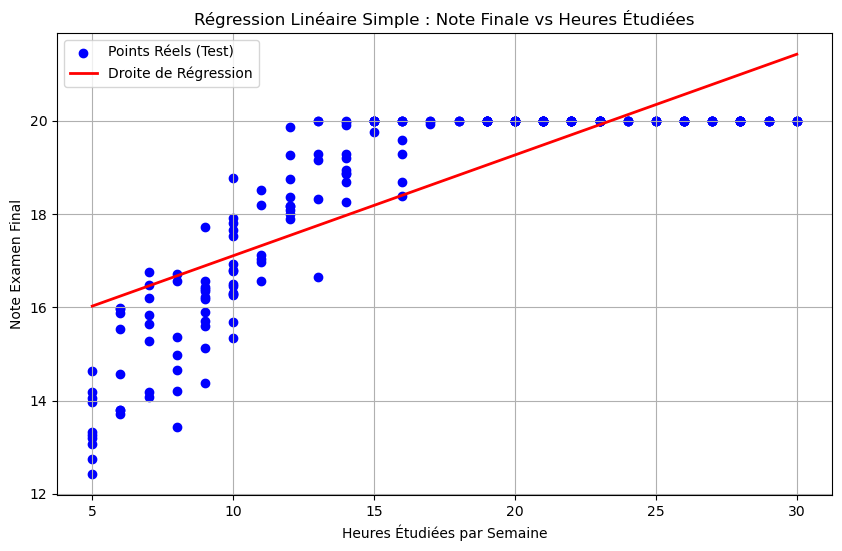

In [80]:
print("\nVisualisation des résultats de la Régression Linéaire Simple :")

plt.figure(figsize=(10, 6))

# Tracer les points de l'ensemble de test (Heures Étudiées vs Note Finale Réelle)
plt.scatter(X_test_lin['Hours_Studied'], y_test_lin, color='blue', label='Points Réels (Test)')

# Tracer la droite de régression
x_for_plot = np.linspace(X_test_lin['Hours_Studied'].min(), X_test_lin['Hours_Studied'].max(), 100).reshape(-1, 1)

# Prédire les valeurs y correspondant à ces points x_for_plot en utilisant le modèle entraîné
y_for_plot = model_lin.predict(x_for_plot)

# Tracer la droite en connectant les points (x_for_plot, y_for_plot)
plt.plot(x_for_plot, y_for_plot, color='red', linewidth=2, label='Droite de Régression')

# Ajouter titres et labels
plt.title('Régression Linéaire Simple : Note Finale vs Heures Étudiées')
plt.xlabel('Heures Étudiées par Semaine')
plt.ylabel('Note Examen Final')
plt.legend() # Affiche la légende (Points Réels, Droite de Régression)
plt.grid(True) # Ajoute une grille
plt.show() # Affiche le graphique

# Partie 2 : Régression Logistique - Prédire la Réussite au Cours (``Passed_Course``)
Maintenant, on va construire un modèle pour prédire si un étudiant réussira ou non le cours (un résultat binaire).

## Étape 9 : Préparer les Données pour la Régression Logistique
On utilise les mêmes variables explicatives (X) mais la variable cible change.

In [83]:
# Sélectionner les variables explicatives (X) et la nouvelle variable cible binaire (y)
X_log = data[['Hours_Studied', 'Previous_Score', 'Attendance_Rate']] 
y_log = data['Passed_Course'] # 0 ou 1)

## Étape 10 : Séparer les Données en Ensembles d'Entraînement et de Test
On sépare à nouveau les données. On peut utiliser les mêmes proportions que pour la régression linéaire.

In [86]:
# Séparer les Données en training set et test set 
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=0, stratify=y_log)

print(f"Dimensions ensembles Training (Logistique) : X={X_train_log.shape}, y={y_train_log.shape}")
print(f"Dimensions ensembles Test (Logistique) : X={X_test_log.shape}, y={y_test_log.shape}")


Dimensions ensembles Training (Logistique) : X=(800, 3), y=(800,)
Dimensions ensembles Test (Logistique) : X=(200, 3), y=(200,)


In [88]:
# Cellule de vérification : Distribution des classes dans la variable cible (y_log)
print("\nDistribution des classes dans la variable cible 'Passed_Course' (y_log) dans le dataset complet :")
print(y_log.value_counts())



Distribution des classes dans la variable cible 'Passed_Course' (y_log) dans le dataset complet :
Passed_Course
1    908
0     92
Name: count, dtype: int64


## Étape 11 : Construire et Entraîner le Modèle de Régression Logistique
On crée une instance de LogisticRegression et on l'entraîne. La régression logistique modélise la probabilité d'appartenance à une classe.

In [91]:
# Créer une instance du modèle de Régression Logistique
model_log = LogisticRegression(solver='liblinear', random_state=0)

# Entraîner le modèle
model_log.fit(X_train_log, y_train_log)

print("\nModèle de Régression Logistique entraîné.")


Modèle de Régression Logistique entraîné.


## Étape 12 : Faire des Prédictions et Évaluer le Modèle Logistique
On prédit les classes (0 ou 1) pour l'ensemble de test et on évalue le modèle avec des métriques adaptées à la classification comme l'accuracy, la matrice de confusion, et le rapport de classification (précision, rappel, F1-score).

In [94]:
# Faire des prédictions sur l'ensemble de test
y_pred_log = model_log.predict(X_test_log)

# Évaluer le modèle
accuracy = accuracy_score(y_test_log, y_pred_log)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
class_report = classification_report(y_test_log, y_pred_log)

print("\n--- Évaluation du Modèle de Régression Logistique ---")
print(f"Accuracy (Précision Globale) : {accuracy:.2f}")
print("\nMatrice de Confusion :")
print(conf_matrix)
print("\nRapport de Classification :")
print(class_report)


--- Évaluation du Modèle de Régression Logistique ---
Accuracy (Précision Globale) : 0.96

Matrice de Confusion :
[[ 13   5]
 [  2 180]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.97      0.99      0.98       182

    accuracy                           0.96       200
   macro avg       0.92      0.86      0.88       200
weighted avg       0.96      0.96      0.96       200



## Étape 13 : Visualisation 2D de la Régression Logistique (avec un seul prédicteur)



Visualisation 2D de la Régression Logistique (Hours_Studied vs Passed_Course)...


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


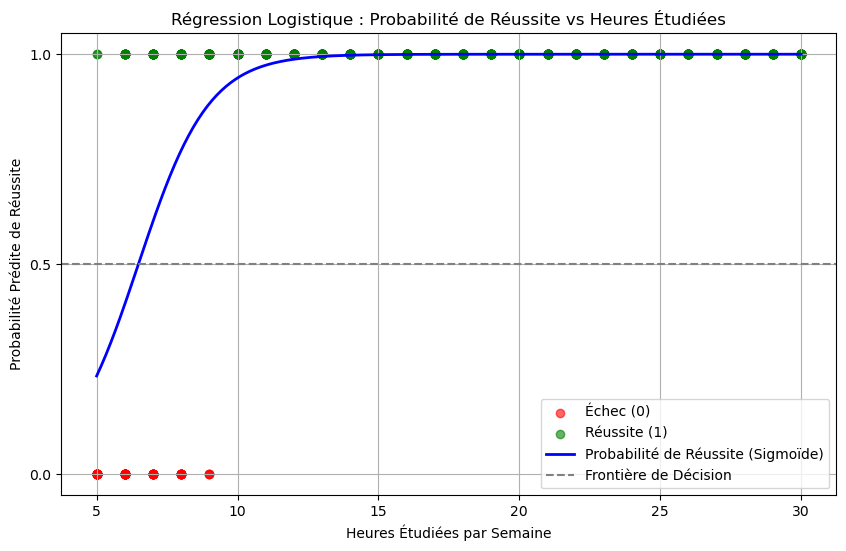

In [96]:
# On prend le prédicteur que l'on veut visualiser (ici Hours_Studied)
X_visualisation = data[['Hours_Studied']]
# Et la variable cible binaire
y_visualisation = data['Passed_Course']

# On l'entraîne sur le dataset complet pour avoir une courbe basée sur toutes les données
model_log_visualisation = LogisticRegression(solver='liblinear', random_state=0)
model_log_visualisation.fit(X_visualisation, y_visualisation)

# On prend des points entre la valeur min et max de Hours_Studied dans tout le dataset
X_range_vis = np.linspace(X_visualisation['Hours_Studied'].min(), X_visualisation['Hours_Studied'].max(), 300).reshape(-1, 1)

# On prend la deuxième colonne (index 1) qui correspond à la probabilité de la classe positive (1, Réussite)
y_proba_vis = model_log_visualisation.predict_proba(X_range_vis)[:, 1]

# 5. Tracer le graphique

plt.figure(figsize=(10, 6))

# Tracer les points réels du dataset
# On sépare les points des échecs (0) et des réussites (1) pour mieux les visualiser
plt.scatter(data[data['Passed_Course'] == 0]['Hours_Studied'], data[data['Passed_Course'] == 0]['Passed_Course'], color='red', label='Échec (0)', alpha=0.6)
plt.scatter(data[data['Passed_Course'] == 1]['Hours_Studied'], data[data['Passed_Course'] == 1]['Passed_Course'], color='green', label='Réussite (1)', alpha=0.6)

# Tracer la courbe sigmoïde
plt.plot(X_range_vis, y_proba_vis, color='blue', linewidth=2, label='Probabilité de Réussite (Sigmoïde)')

# Ajouter une ligne horizontale à y=0.5 qui représente la frontière de décision
# Au-dessus de cette ligne, la probabilité prédite est > 0.5, donc la classe prédite est 1
plt.axhline(0.5, color='gray', linestyle='--', label='Frontière de Décision')

# Ajouter titres et labels
plt.title('Régression Logistique : Probabilité de Réussite vs Heures Étudiées')
plt.xlabel('Heures Étudiées par Semaine')
plt.ylabel('Probabilité Prédite de Réussite') # L'axe Y représente la probabilité
plt.yticks([0, 0.5, 1]) # Pour afficher des valeurs importantes sur l'axe Y
plt.legend()
plt.grid(True)
plt.show()